In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

In [176]:
history_0 = pd.read_hdf(f'./regelum_data/outputs/2024-04-17/16-03-50/0/.callbacks/HistoricalDataCallback/observations_actions_it_00029_ep_00008.h5')[1:]
history_1 = pd.read_hdf(f'./regelum_data/outputs/2024-04-17/16-08-03/0/.callbacks/HistoricalDataCallback/observations_actions_it_00029_ep_00008.h5')[1:]

In [177]:
history_sim = pd.read_hdf(f'./regelum_data/outputs/2024-04-17/14-50-59/0/.callbacks/HistoricalDataCallback/observations_actions_it_00300_ep_00008.h5')[1:]

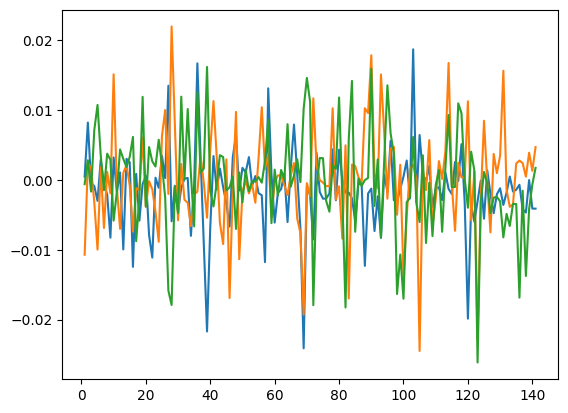

In [178]:
plt.plot(history_sim.returns_0)
plt.plot(history_sim.returns_1)
plt.plot(history_sim.returns_2)

In [179]:
np.std(history_sim.returns_0)

0.00561225707760217

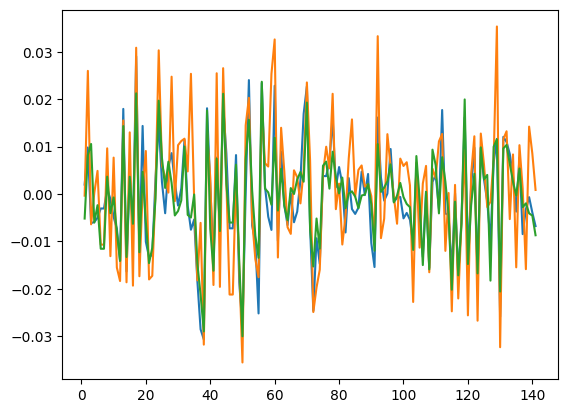

In [180]:
plt.plot(history_0.returns_0)
plt.plot(history_0.returns_1)
plt.plot(history_0.returns_2)

In [170]:
def calculate_sharpe_PnL():

    for j in range(10, 51):
        sharpe_0 = []
        sharpe_1 = []
        sharpe_based = []
        pnl_0 = []
        pnl_1 = []
        pnl_based = []
        returns_0 = []
        returns_1 = []
        for i in range(1, 16):
            if i>=10:
                history_0 = pd.read_hdf(f'./regelum_data/outputs/2024-04-17/16-03-50/0/.callbacks/HistoricalDataCallback/observations_actions_it_000{j}_ep_000{i}.h5')[1:]
                history_1 = pd.read_hdf(f'./regelum_data/outputs/2024-04-17/16-08-03/0/.callbacks/HistoricalDataCallback/observations_actions_it_000{j}_ep_000{i}.h5')[1:]
            else:
                history_0 = pd.read_hdf(f'./regelum_data/outputs/2024-04-17/16-03-50/0/.callbacks/HistoricalDataCallback/observations_actions_it_000{j}_ep_0000{i}.h5')[1:]
                history_1 = pd.read_hdf(f'./regelum_data/outputs/2024-04-17/16-08-03/0/.callbacks/HistoricalDataCallback/observations_actions_it_000{j}_ep_0000{i}.h5')[1:]
            history_0['PnL'] = (history_0['current_price_0 [USD]']*history_0['current_volume_0'] +
                history_0['current_price_1 [USD]']*history_0['current_volume_1']+
                history_0['current_price_2 [USD]']*history_0['current_volume_2']+
                history_0['cash [USD]'])
            history_1['PnL'] = (history_1['current_price_0 [USD]']*history_1['current_volume_0'] +
                history_1['current_price_1 [USD]']*history_1['current_volume_1']+
                history_1['current_price_2 [USD]']*history_1['current_volume_2']+
                history_1['cash [USD]'])
            history_0['sum_of_prices'] = (history_0['current_price_0 [USD]'] +
                history_0['current_price_1 [USD]']+
                history_0['current_price_2 [USD]']+ 100)
            history_0['port_return'] = (history_0['PnL'] - history_0['PnL'].shift(1))/history_0['PnL'].shift(1)
            history_1['port_return'] = (history_1['PnL'] - history_1['PnL'].shift(1))/history_1['PnL'].shift(1)
            returns_0.extend(history_0['port_return'].to_list())
            returns_1.extend(history_1['port_return'].to_list())
            sharpe_based.append(np.mean((history_0['sum_of_prices'] - history_0['sum_of_prices'].shift(1))/history_0['sum_of_prices'].shift(1))/np.std((history_0['sum_of_prices'] - history_0['sum_of_prices'].shift(1))/history_0['sum_of_prices'].shift(1)))
            sharpe_0.append(np.mean((history_0['PnL'] - history_0['PnL'].shift(1))/history_0['PnL'].shift(1))/np.std((history_0['PnL'] - history_0['PnL'].shift(1))/history_0['PnL'].shift(1)))
            sharpe_1.append(np.mean((history_1['PnL'] - history_1['PnL'].shift(1))/history_1['PnL'].shift(1))/np.std((history_1['PnL'] - history_1['PnL'].shift(1))/history_1['PnL'].shift(1)))
            pnl_0.append(history_0['PnL'].iloc[-1])
            pnl_1.append(history_1['PnL'].iloc[-1])
            pnl_based.append(history_0['sum_of_prices'].iloc[-1])
        print(j,np.mean(sharpe_based), np.mean(sharpe_0), np.mean(sharpe_1), np.mean(pnl_based), np.mean(pnl_0), np.mean(pnl_1))
        print(ttest_ind(returns_0, returns_1, alternative = 'less', nan_policy = 'omit'))
        print(ttest_ind(sharpe_0, sharpe_1, alternative = 'less', nan_policy = 'omit'))
    return returns_0, returns_1, sharpe_0, sharpe_1

returns_0, returns_1, sharpe_0, sharpe_1 = calculate_sharpe_PnL()

10 0.06956818204369143 0.07048541637908633 0.00836035683947628 342.90399999999994 342.1142372514904 332.9537925569372
TtestResult(statistic=2.0650317091360457, pvalue=0.9805093695297723, df=4198.0)
TtestResult(statistic=2.3318239373503737, pvalue=0.9864353117883865, df=28.0)
11 0.02979064831166832 0.03072744104082615 0.02245179344471186 378.24799999999993 378.4457901253731 380.053683854936
TtestResult(statistic=0.1830731558182121, pvalue=0.5726252704625553, df=4198.0)
TtestResult(statistic=0.30698035310531074, pvalue=0.6194350922644519, df=28.0)
12 -0.009380419747609269 -0.010697383050612812 -0.015163109346463697 327.4946666666666 327.61506087095705 328.62019040397104
TtestResult(statistic=-0.1534800957651608, pvalue=0.4390135312487954, df=4198.0)
TtestResult(statistic=0.17244161583175577, pvalue=0.5678346173804875, df=28.0)
13 0.016477807123162585 0.015110697415590218 0.0037647874804763006 362.86133333333333 362.2625077631902 358.12602306132237
TtestResult(statistic=0.8005687209129801